In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## 1、导入数据

y = 1. It's a cat picture.


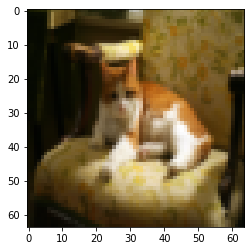

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

index = 7
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

#### 观察数据集

In [3]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


#### 将三通道张量改为向量

In [5]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T  # -1表示自动根据大小进行调整
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# 数据标准化
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))  # 64*64*3
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


## 2、两层神经网络

In [6]:
%%capture
%run "./DNN.ipynb"

In [13]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    grads = {}
    costs = []                              
    m = X.shape[1]
    (n_x, n_h, n_y) = layers_dims
    
    # 初始化参数
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # 循环（梯度下降）
    for i in range(1, num_iterations):
        
        # 前向传播
        A1, cache1 =linear_activation_forward(X, W1, b1, activation = "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation = "sigmoid")
        
        # 计算损失函数
        cost = compute_cost(A2, Y)
        
        # 反向传播
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "relu")
        
        # 更新梯度
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        parameters = update_parameters(parameters, grads, learning_rate)
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    # 画图   
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

#### 训练

Cost after iteration 100: 0.6465275050316124
Cost after iteration 200: 0.6327213252763718
Cost after iteration 300: 0.6018910646433422
Cost after iteration 400: 0.5606304805447433
Cost after iteration 500: 0.516283983412948
Cost after iteration 600: 0.4767314666236869
Cost after iteration 700: 0.43670615276708274
Cost after iteration 800: 0.390170859792532
Cost after iteration 900: 0.3530123953978948
Cost after iteration 1000: 0.33558946895202296
Cost after iteration 1100: 0.30604746726012966
Cost after iteration 1200: 0.2788707282787334
Cost after iteration 1300: 0.2550266229795085
Cost after iteration 1400: 0.2061928925792851
Cost after iteration 1500: 0.18413592869083287
Cost after iteration 1600: 0.1773661039137341
Cost after iteration 1700: 0.11399891564554347
Cost after iteration 1800: 0.0967010139524786
Cost after iteration 1900: 0.08367289578078568
Cost after iteration 2000: 0.07458506999166606
Cost after iteration 2100: 0.06642517342430937
Cost after iteration 2200: 0.05924247

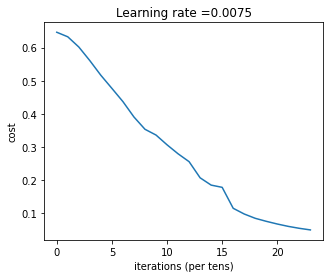

In [14]:
n_x = 12288     
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

#### 精度

In [15]:
predictions_train = predict(train_x, train_y, parameters)
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.9999999999999998
Accuracy: 0.72


## 3、L层神经网络

In [16]:
layers_dims = [12288, 20, 7, 5, 1]  # 4层模型

In [22]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    costs = []  # 保存损失函数，用来画图
    
    # 初始化
    parameters = initialize_parameters_deep(layers_dims)
     
    # 循环（梯度下降）
    for i in range(num_iterations):
        
        # 前向传播
        AL, caches = L_model_forward(X, parameters)
        
        # 计算损失函数
        cost = compute_cost(AL, Y)
        
        # 反向传播
        grads = L_model_backward(AL, Y, caches)
        
        # 更新梯度
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # 画图
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

#### 训练

Cost after iteration 0: 0.693148
Cost after iteration 100: 0.678011
Cost after iteration 200: 0.667600
Cost after iteration 300: 0.660422
Cost after iteration 400: 0.655458
Cost after iteration 500: 0.652013
Cost after iteration 600: 0.649616
Cost after iteration 700: 0.647942
Cost after iteration 800: 0.646770
Cost after iteration 900: 0.645947
Cost after iteration 1000: 0.645368
Cost after iteration 1100: 0.644961
Cost after iteration 1200: 0.644673
Cost after iteration 1300: 0.644469
Cost after iteration 1400: 0.644325
Cost after iteration 1500: 0.644223
Cost after iteration 1600: 0.644151
Cost after iteration 1700: 0.644100
Cost after iteration 1800: 0.644063
Cost after iteration 1900: 0.644037
Cost after iteration 2000: 0.644019
Cost after iteration 2100: 0.644006
Cost after iteration 2200: 0.643997
Cost after iteration 2300: 0.643990
Cost after iteration 2400: 0.643985


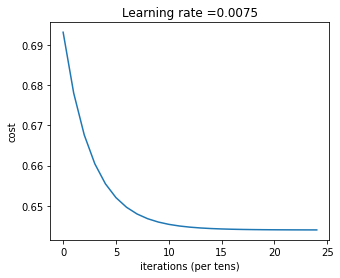

In [23]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

#### 计算精度

In [24]:
pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.6555023923444976
Accuracy: 0.3400000000000001


#### 错误图像

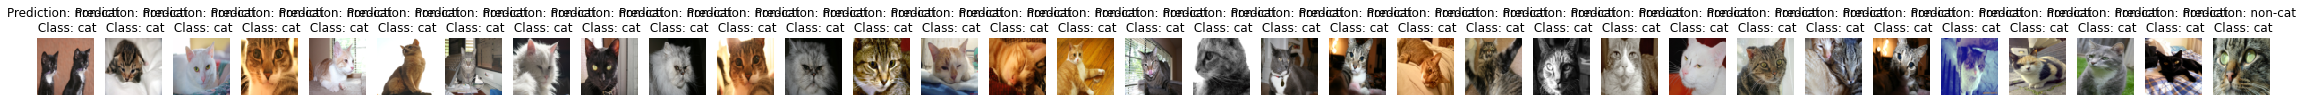

In [25]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

## 4、测试自己的图片

Accuracy: 0.0
y = 0.0, your L-layer model predicts a "non-cat" picture.


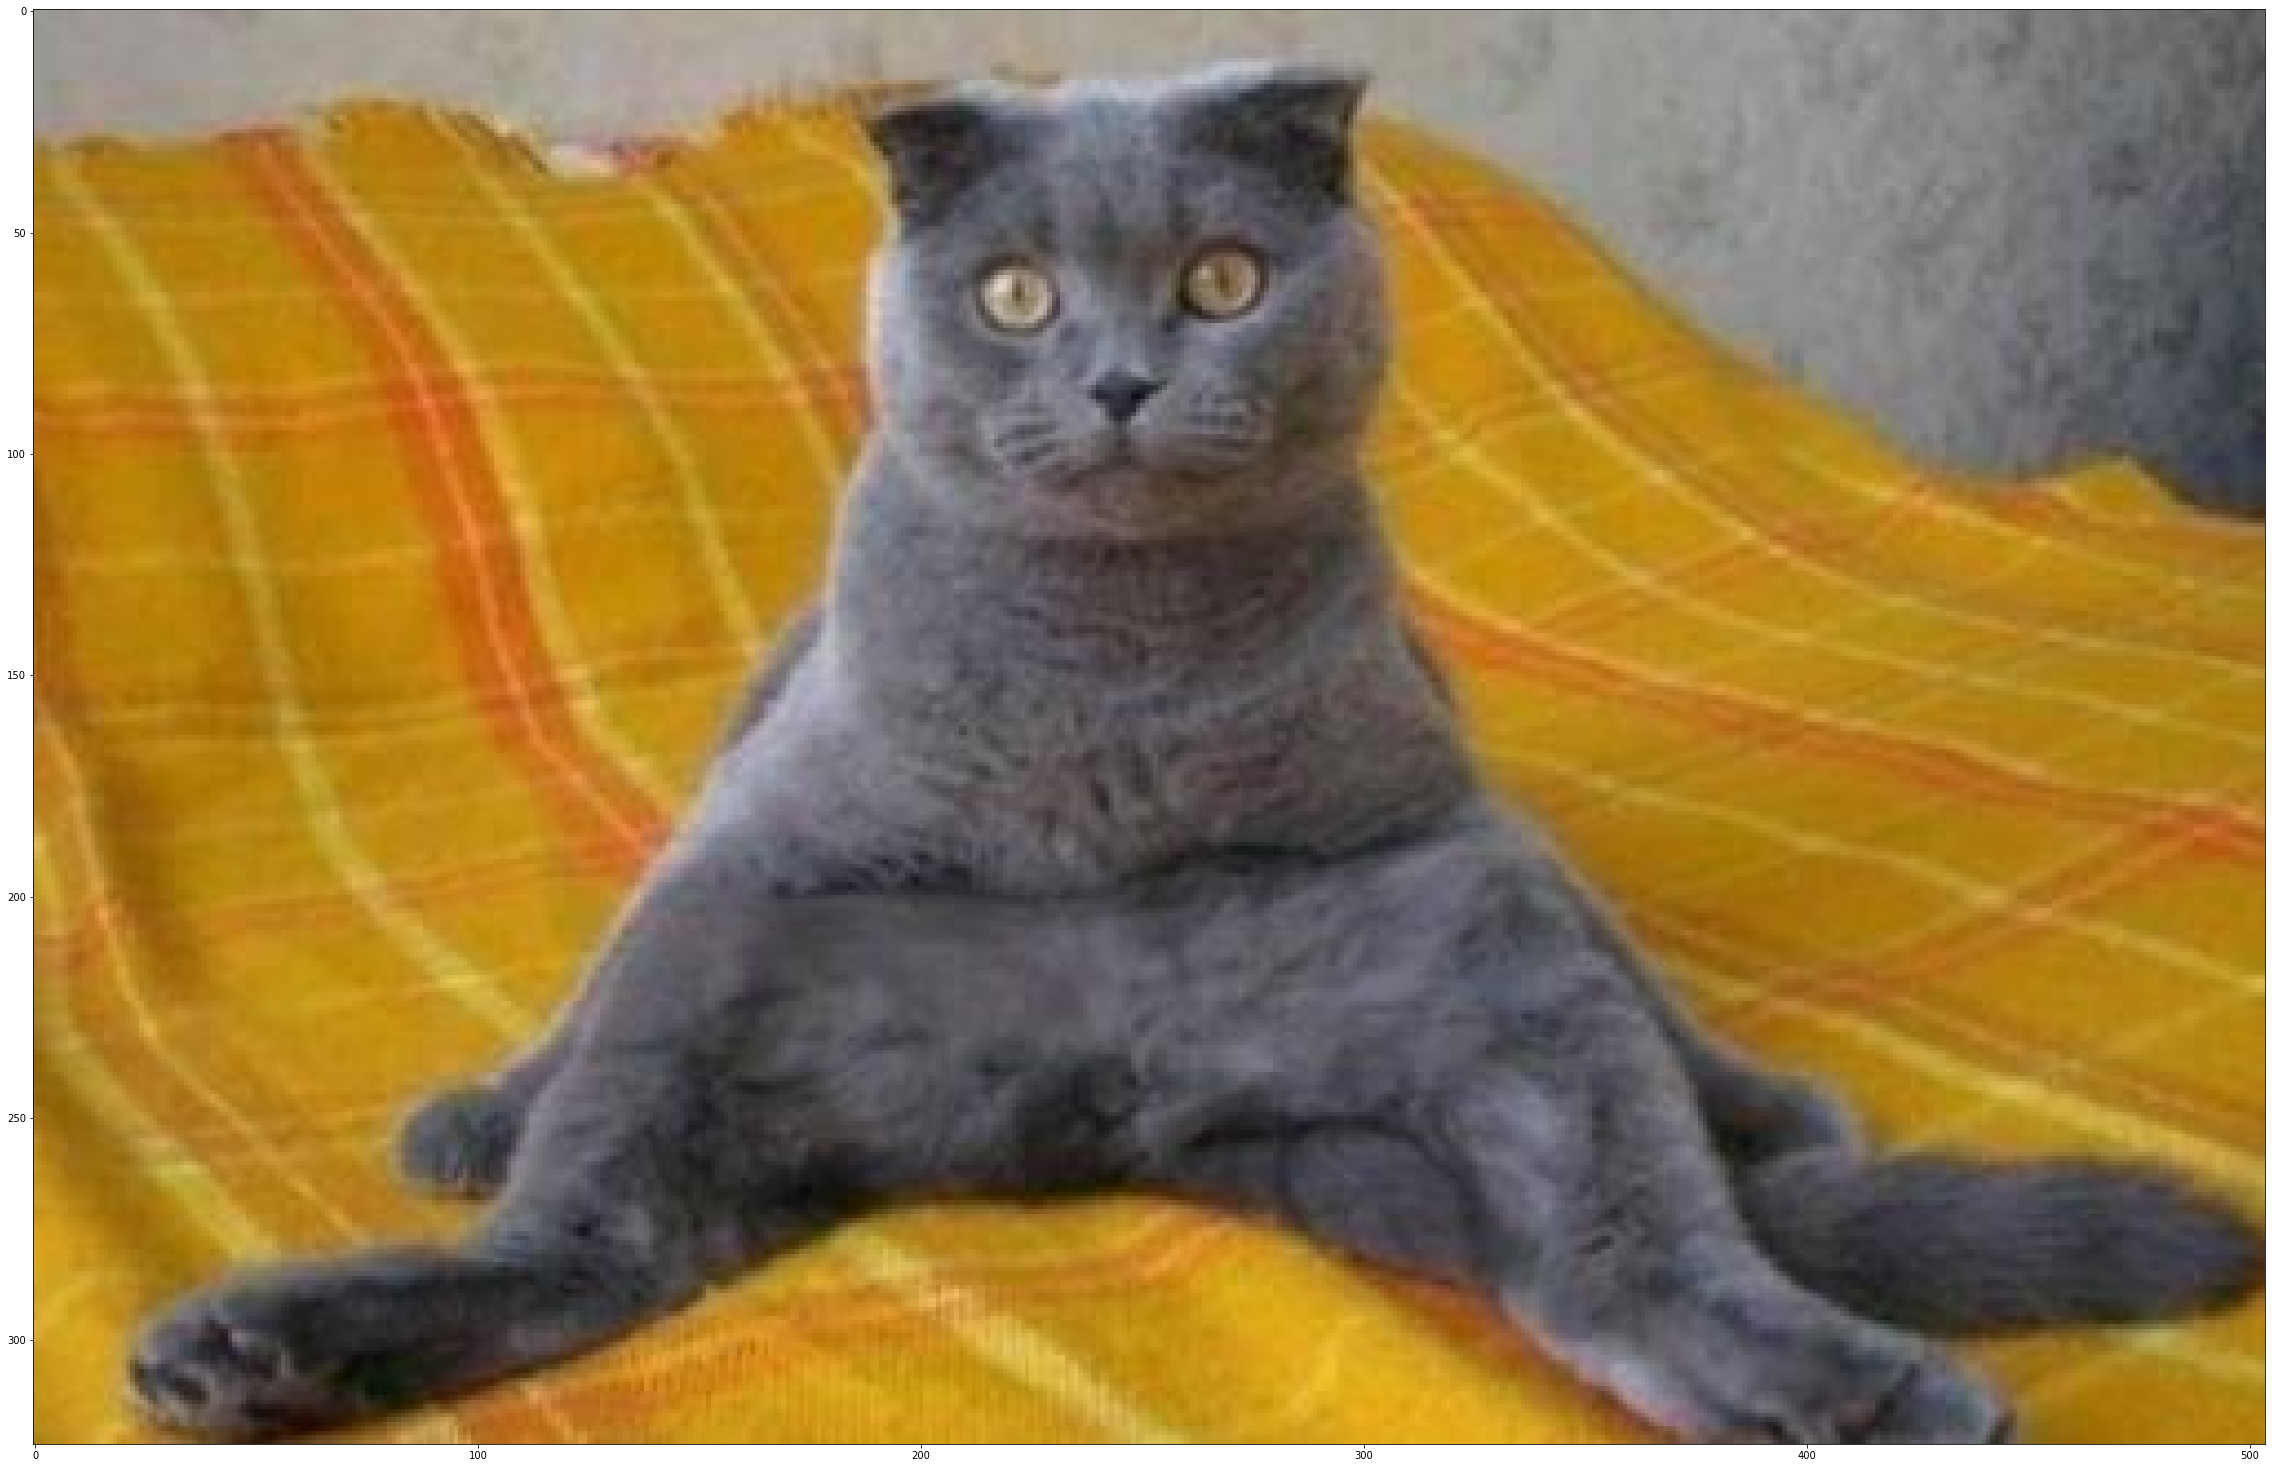

In [30]:
my_image = "my_image2.jpg" # 文件路径 
my_label_y = [1]  # 真实标签

fname = my_image
image = np.array(plt.imread(fname))
my_image = np.array(Image.fromarray(image).resize(size=(num_px,num_px))).reshape((num_px*num_px*3,1))
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

# 效果真垃圾！！！